<a href="https://colab.research.google.com/github/jananialagar4/CNN_Classification_of_subImages_using_-ARUCOmarkers/blob/main/model(inception).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#module_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2"

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
base_dir = "/content/drive/MyDrive/training"

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pretrained_model = InceptionV3(input_shape=(224,224,3),
                               weights='imagenet',
                               include_top=False)

In [ ]:
"""train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)"""

'train_ds = tf.keras.utils.image_dataset_from_directory(\n  data_dir,\n  validation_split=0.2,\n  subset="training",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)'

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_gen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

test_gen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

Found 349 images belonging to 5 classes.
Found 37 images belonging to 5 classes.


In [ ]:
type(train_datagen)

keras.src.preprocessing.image.ImageDataGenerator

In [ ]:
print(train_gen)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
# Freezing layers in convolutional base
pretrained_model.trainable = False
# Custom classification block (see note 9, below)
x = layers.GlobalAveragePooling2D()(pretrained_model.output)
x = layers.Dense(5, activation='softmax')(x)
# Compiling the model
model = Model(pretrained_model.input, x)
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

In [ ]:
from tensorflow.keras.callbacks import Callback
# Callback class for early stopping
class mycallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') <= 0.09:
            self.model.stop_training = True
        if logs.get('acc') == 1.00:
            self.model.stop_training = True

In [ ]:
EPOCHS = 10
# Creating variable to be passed as argument when fitting
callbacks = [mycallback()]
# Fitting model for our custom task
history = model.fit(train_gen,
                              validation_data=test_gen,
                              callbacks=callbacks,
                              epochs = EPOCHS,
                              verbose = 2)

Epoch 1/10
6/6 - 15s - loss: 1.5741 - acc: 0.3381 - val_loss: 0.9297 - val_acc: 0.6216 - 15s/epoch - 2s/step
Epoch 2/10
6/6 - 9s - loss: 0.8039 - acc: 0.7507 - val_loss: 0.4021 - val_acc: 0.9459 - 9s/epoch - 1s/step
Epoch 3/10
6/6 - 9s - loss: 0.4704 - acc: 0.8739 - val_loss: 0.2104 - val_acc: 1.0000 - 9s/epoch - 2s/step
Epoch 4/10
6/6 - 7s - loss: 0.3136 - acc: 0.9198 - val_loss: 0.1399 - val_acc: 1.0000 - 7s/epoch - 1s/step
Epoch 5/10
6/6 - 9s - loss: 0.2647 - acc: 0.9284 - val_loss: 0.1173 - val_acc: 1.0000 - 9s/epoch - 1s/step
Epoch 6/10
6/6 - 7s - loss: 0.2183 - acc: 0.9484 - val_loss: 0.0864 - val_acc: 1.0000 - 7s/epoch - 1s/step
Epoch 7/10
6/6 - 7s - loss: 0.1699 - acc: 0.9685 - val_loss: 0.0754 - val_acc: 1.0000 - 7s/epoch - 1s/step
Epoch 8/10
6/6 - 8s - loss: 0.1459 - acc: 0.9685 - val_loss: 0.0675 - val_acc: 1.0000 - 8s/epoch - 1s/step
Epoch 9/10
6/6 - 9s - loss: 0.1344 - acc: 0.9742 - val_loss: 0.0651 - val_acc: 1.0000 - 9s/epoch - 1s/step
Epoch 10/10
6/6 - 7s - loss: 0.1281

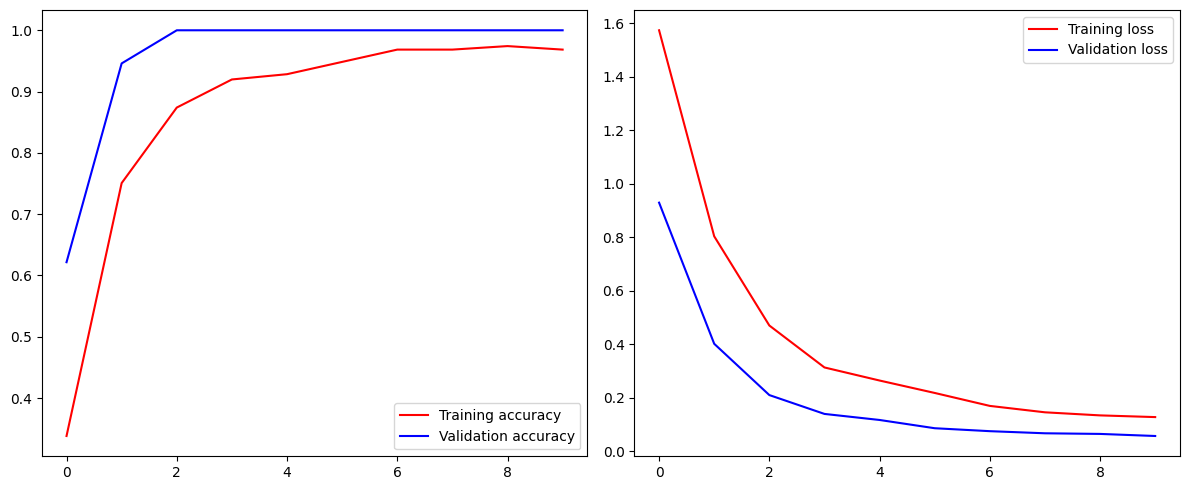

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Defining dependent variables for plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Defining independent variable for plotting
epochs = range(len(acc))
# Creating grid of subplots
fit, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.axes_style('whitegrid')
# Plotting accuracy
sns.lineplot(x=epochs,
             y=acc,
             color='r',
             label='Training accuracy',
             ax=axes[0])
sns.lineplot(x=epochs,
             y=val_acc,
             color = 'b',
             label='Validation accuracy',
             ax=axes[0])
# Plotting loss
sns.lineplot(x=epochs,
             y=loss,
             color='r',
             label='Training loss',
             ax=axes[1])
sns.lineplot(x=epochs,
             y=val_loss,
             color = 'b',
             label='Validation loss',
             ax=axes[1])
plt.tight_layout()
plt.show();

In [ ]:
model.save('/content/drive/MyDrive/modelcnn/yourmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.evaluate(test_gen)

1/1 [==============================] - 1s 630ms/step - loss: 0.0574 - acc: 1.0000


[0.05739537999033928, 1.0]